<a href="https://colab.research.google.com/github/Sainikithaharish06/Hepatitis.NN./blob/main/Hepatitis_NN_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
hepi=pd.read_csv("hepatitis.csv")
hepi

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [ ]:
hepi.isna().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [ ]:
hepi.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.816901,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,0.388116,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [ ]:
not_good= hepi['class']<=1
is_good= hepi['class']>=2
print(not_good.value_counts())
print(is_good.value_counts())
hepi['class'][not_good]=0
hepi['class'][is_good]=1
hepi['class'].value_counts()
print(hepi)

False    116
True      26
Name: class, dtype: int64
True     116
False     26
Name: class, dtype: int64
     class  age  sex  steroid  antivirals  fatigue  malaise  anorexia  \
0        1   30    2        1           2        2        2         2   
1        1   50    1        1           2        1        2         2   
2        1   78    1        2           2        1        2         2   
3        1   34    1        2           2        2        2         2   
4        1   34    1        2           2        2        2         2   
..     ...  ...  ...      ...         ...      ...      ...       ...   
137      0   46    1        2           2        1        1         1   
138      1   44    1        2           2        1        2         2   
139      1   61    1        1           2        1        1         2   
140      1   53    2        1           2        1        2         2   
141      0   43    1        2           2        1        2         2   

     liver_big  liv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
not_good=hepi['age']<=20
is_good=hepi['age']>=90
hepi['age'][not_good]=0
hepi['age'][is_good]=1
not_good= hepi['sex']<=1
is_good= hepi['sex']>=2
hepi['sex'][not_good]=0
hepi['sex'][is_good]=1
not_good= hepi['steroid']<=1
is_good= hepi['steroid']>=2
hepi['steroid'][not_good]=0
hepi['steroid'][is_good]=1
not_good= hepi['antivirals']<=1
is_good= hepi['antivirals']>=2
hepi['antivirals'][not_good]=0
hepi['antivirals'][is_good]=1
not_good= hepi['fatigue']<=1
is_good= hepi['fatigue']>=2
hepi['fatigue'][not_good]=0
hepi['fatigue'][is_good]=1
not_good= hepi['malaise']<=1
is_good= hepi['malaise']>=2
hepi['malaise'][not_good]=0
hepi['malaise'][is_good]=1
not_good= hepi['anorexia']<=1
is_good= hepi['anorexia']>=2
hepi['anorexia'][not_good]=0
hepi['anorexia'][is_good]=1
not_good= hepi['liver_big']<=1
is_good= hepi['liver_big']>=2
hepi['liver_big'][not_good]=0
hepi['liver_big'][is_good]=1
not_good= hepi['liver_firm']<=1
is_good= hepi['liver_firm']>=2
hepi['liver_firm'][not_good]=0
hepi['liver_firm'][is_good]=1
not_good= hepi['spleen_palable']<=1
is_good= hepi['spleen_palable']>=2
hepi['spleen_palable'][not_good]=0
hepi['spleen_palable'][is_good]=1
not_good= hepi['spiders']<=1
is_good= hepi['spiders']>=2
hepi['spiders'][not_good]=0
hepi['spiders'][is_good]=1
not_good= hepi['ascites']<=1
is_good= hepi['ascites']>=2
hepi['ascites'][not_good]=0
hepi['ascites'][is_good]=1
not_good= hepi['sgot']<=20
is_good= hepi['sgot']>=300
hepi['sgot'][not_good]=0
hepi['sgot'][is_good]=1
not_good= hepi['protime']<=1
is_good= hepi['protime']>=2
hepi['protime'][not_good]=0
hepi['protime'][is_good]=1
not_good= hepi['histology']<=1
is_good= hepi['histology']>=2
hepi['histology'][not_good]=0
hepi['histology'][is_good]=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
x= hepi.drop("class", axis=1)
y=hepi["class"]
x.head

<bound method NDFrame.head of      age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0     30    1        0           1        1        1         1          0   
1     50    0        0           1        0        1         1          0   
2     78    0        1           1        0        1         1          1   
3     34    0        1           1        1        1         1          1   
4     34    0        1           1        1        1         1          1   
..   ...  ...      ...         ...      ...      ...       ...        ...   
137   46    0        1           1        0        0         0          1   
138   44    0        1           1        0        1         1          1   
139   61    0        0           1        0        0         1          0   
140   53    1        0           1        0        1         1          1   
141   43    0        1           1        0        1         1          1   

     liver_firm  spleen_palable  spiders  asc

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

131    1
19     1
81     0
96     1
56     1
12     1
98     1
65     1
66     1
18     1
51     1
77     1
93     0
115    1
130    1
64     1
27     1
69     1
124    0
73     1
11     1
118    1
109    1
112    1
55     1
45     1
9      1
4      1
26     1
123    1
31     1
97     0
36     1
16     1
10     1
140    1
110    1
42     1
117    0
86     1
95     1
60     1
0      1
Name: class, dtype: int64

In [ ]:
tf.random.set_seed(42)


model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])



model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ])
              

history= model.fit(x_train, y_train, epochs= 150)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 5ms/step - loss: 4.7943 - accuracy: 0.3636 - precision: 0.7586 - a=recall: 0.2821
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 2.3745 - accuracy: 0.6970 - precision: 0.7667 - a=recall: 0.8846
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 2.4679 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 1.6063 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 1.3505 - accuracy: 0.4444 - precision: 0.7556 - a=recall: 0.4359
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 1.5320 - accuracy: 0.3535 - precision: 0.8889 - a=recall: 0.2051
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.7420 - accuracy: 0.6364 - precision: 0.8000 - a=recall: 0.7179
Epoch 8/150
4/4 [==============================] - 0s 5ms/st

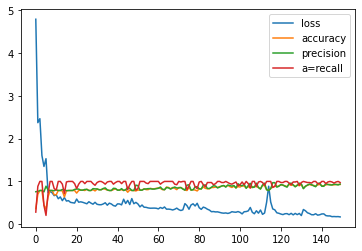

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4071 - accuracy: 0.8837 - precision: 0.9231 - a=recall: 0.9474


[0.4071151912212372,
 0.8837209343910217,
 0.9230769276618958,
 0.9473684430122375]

In [ ]:
tf.random.set_seed(42)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])



model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ])
              

history= model.fit(x_train, y_train, epochs= 200)


Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 4ms/step - loss: 1.2124 - accuracy: 0.7576 - precision: 0.7812 - a=recall: 0.9615
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.8749 - accuracy: 0.7576 - precision: 0.7872 - a=recall: 0.9487
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.7475 - precision: 0.7912 - a=recall: 0.9231
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.7071 - precision: 0.7952 - a=recall: 0.8462
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.6667 - precision: 0.8082 - a=recall: 0.7564
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6013 - accuracy: 0.6465 - precision: 0.8209 - a=recall: 0.7051
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.6465 - precision: 0.8209 - a=recall: 0.7051
Epoch 8/200
4/4 [==============================] - 0s 4ms/st

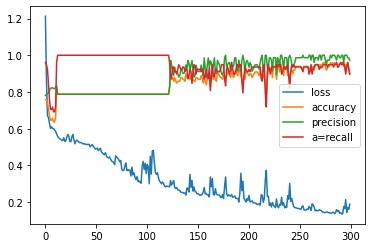

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4051 - accuracy: 0.8605 - precision: 0.9444 - a=recall: 0.8947


[0.40509557723999023,
 0.8604651093482971,
 0.9444444179534912,
 0.8947368264198303]

In [ ]:
tf.random.set_seed(42)

model= tf.keras.Sequential([
    
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='a=recall')
              ])
history=model.fit(x_train,y_train,epochs=300)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 5ms/step - loss: 56.5838 - accuracy: 0.2121 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 42.2278 - accuracy: 0.2121 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 28.4458 - accuracy: 0.2121 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 14.4976 - accuracy: 0.2929 - precision: 0.8333 - a=recall: 0.1282
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 3.4583 - accuracy: 0.4646 - precision: 0.7907 - a=recall: 0.4359
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 3.1619 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 4.7216 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 8/300
4/4 [===============

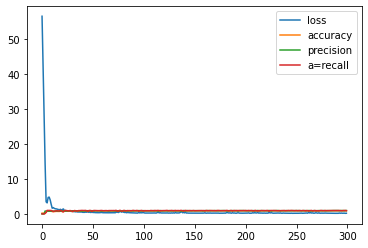

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4443 - accuracy: 0.8140 - precision: 0.8947 - a=recall: 0.8947


[0.4443169832229614,
 0.8139534592628479,
 0.8947368264198303,
 0.8947368264198303]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test

131    1
19     1
81     0
96     1
56     1
12     1
98     1
65     1
66     1
18     1
51     1
77     1
93     0
115    1
130    1
64     1
27     1
69     1
124    0
73     1
11     1
118    1
109    1
112    1
55     1
45     1
9      1
4      1
26     1
Name: class, dtype: int64

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential ([
                           tf.keras.layers.Dense(10, activation='relu'),
                           tf.keras.layers.Dense(6, activation='relu'),
                           tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')  
])  

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='a=recall')
              ])

history=model.fit(x_train,y_train,epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 5ms/step - loss: 0.6914 - accuracy: 0.6667 - precision: 0.8358 - a=recall: 0.7179    
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6861 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6721 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6635 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 8/200
4/4 [==============================] - 0s 8m

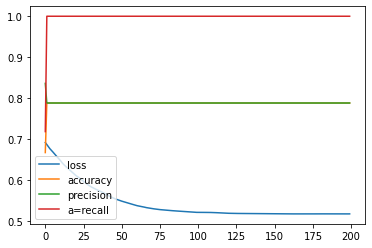

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.3931 - accuracy: 0.8837 - precision: 0.8837 - a=recall: 1.0000


[0.3931141197681427, 0.8837209343910217, 0.8837209343910217, 1.0]

In [ ]:
tf.random.set_seed(42)

model= tf.keras.Sequential([
                     tf.keras.layers.Dense(10, activation='relu'),
                     tf.keras.layers.Dense(6,  activation='relu'),
                     tf.keras.layers.Dense(3, activation='relu' ),
                     tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='a=recall')
              ])
history= model.fit(x_train,y_train,epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 5ms/step - loss: 1.2124 - accuracy: 0.7576 - precision: 0.7812 - a=recall: 0.9615
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.8749 - accuracy: 0.7576 - precision: 0.7872 - a=recall: 0.9487
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.7475 - precision: 0.7912 - a=recall: 0.9231
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.7071 - precision: 0.7952 - a=recall: 0.8462
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.6667 - precision: 0.8082 - a=recall: 0.7564
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6013 - accuracy: 0.6465 - precision: 0.8209 - a=recall: 0.7051
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.6465 - precision: 0.8209 - a=recall: 0.7051
Epoch 8/200
4/4 [==============================] - 0s 5ms/st

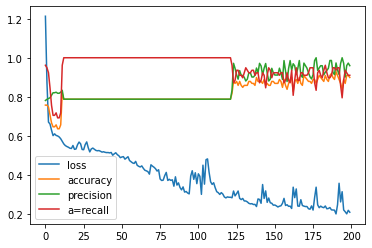

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4051 - accuracy: 0.8605 - precision: 0.9444 - a=recall: 0.8947


[0.40509557723999023,
 0.8604651093482971,
 0.9444444179534912,
 0.8947368264198303]

In [ ]:
tf.random.set_seed(42)

model= tf.keras.Sequential([
                     tf.keras.layers.Dense(10, activation='relu'),
                     tf.keras.layers.Dense(5,  activation='relu'),
                     tf.keras.layers.Dense(2, activation='relu' ),
                     tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='a=recall')
              ])
history= model.fit(x_train,y_train,epochs=300)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 6ms/step - loss: 0.6734 - accuracy: 0.6768 - precision: 0.8382 - a=recall: 0.7308
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6400 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6366 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6399 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6391 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 7/300
4/4 [==============================] - 0s 11ms/step - loss: 0.6347 - accuracy: 0.7879 - precision: 0.7879 - a=recall: 1.0000
Epoch 8/300
4/4 [==============================] - 0s 8ms/s

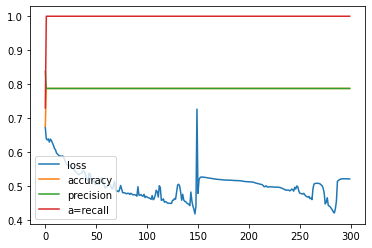

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4182 - accuracy: 0.8837 - precision: 0.8837 - a=recall: 1.0000


[0.41820862889289856, 0.8837209343910217, 0.8837209343910217, 1.0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
y_test

131    1
19     1
81     0
96     1
56     1
12     1
98     1
65     1
66     1
18     1
51     1
77     1
93     0
115    1
130    1
64     1
27     1
69     1
124    0
73     1
11     1
118    1
109    1
112    1
55     1
45     1
9      1
4      1
26     1
123    1
31     1
97     0
36     1
16     1
10     1
140    1
110    1
42     1
117    0
86     1
95     1
60     1
0      1
82     0
28     1
40     1
85     0
24     1
25     1
23     1
78     1
67     0
44     1
15     1
94     1
39     1
22     1
Name: class, dtype: int64

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential ([
                           tf.keras.layers.Dense(10, activation='relu'),
                           tf.keras.layers.Dense(6, activation='relu'),
                           tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')  
])  

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='a=recall')
              ])
history=model.fit(x_train,y_train,epochs=300)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.6235 - precision: 0.8302 - a=recall: 0.6567    
Epoch 2/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 3/300
3/3 [==============================] - 0s 7ms/step - loss: 0.6835 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 4/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6793 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 5/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6753 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 6/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 7/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6676 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 8/300
3/3 [==============================] - 0s 5m

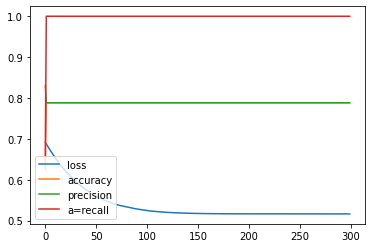

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4228 - accuracy: 0.8596 - precision: 0.8596 - a=recall: 1.0000


[0.42279332876205444, 0.859649121761322, 0.859649121761322, 1.0]

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential ([
                           tf.keras.layers.Dense(10, activation='relu'),
                           tf.keras.layers.Dense(8, activation='relu'),
                           tf.keras.layers.Dense(3, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')  
])  

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='a=recall')
              ])
history=model.fit(x_train,y_train,epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 5ms/step - loss: 5.9696 - accuracy: 0.2235 - precision: 1.0000 - a=recall: 0.0149    
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 1.8320 - accuracy: 0.4118 - precision: 0.9048 - a=recall: 0.2836
Epoch 3/200
3/3 [==============================] - 0s 7ms/step - loss: 0.7802 - accuracy: 0.7294 - precision: 0.8056 - a=recall: 0.8657
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6664 - accuracy: 0.7765 - precision: 0.7857 - a=recall: 0.9851
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6557 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 6/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6421 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 0.6471 - accuracy: 0.7882 - precision: 0.7882 - a=recall: 1.0000
Epoch 8/200
3/3 [==============================] - 0s 7

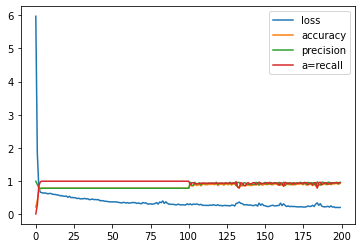

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2494 - accuracy: 0.9123 - precision: 0.9583 - a=recall: 0.9388


[0.24944306910037994,
 0.9122806787490845,
 0.9583333134651184,
 0.9387755393981934]

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential ([
                           tf.keras.layers.Dense(10, activation='relu'),
                           tf.keras.layers.Dense(6, activation='relu'),
                       
                          tf.keras.layers.Dense(2, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid')  
])  

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=[
                       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='a=recall')
              ])
history=model.fit(x_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 6ms/step - loss: 3.4012 - accuracy: 0.7647 - precision: 0.7831 - a=recall: 0.9701
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 1.8136 - accuracy: 0.7059 - precision: 0.7763 - a=recall: 0.8806
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.5647 - precision: 0.8125 - a=recall: 0.5821
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6694 - accuracy: 0.2941 - precision: 0.8182 - a=recall: 0.1343
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.2235 - precision: 1.0000 - a=recall: 0.0149    
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.2235 - precision: 1.0000 - a=recall: 0.0149
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.2118 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 8/100
3/3 [==============================]

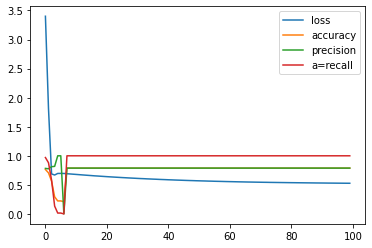

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4583 - accuracy: 0.8596 - precision: 0.8596 - a=recall: 1.0000


[0.45827049016952515, 0.859649121761322, 0.859649121761322, 1.0]